In [1]:
import pandas as pd
import numpy as np
import shmapy

In [2]:
states = pd.DataFrame(pd.read_csv('../static/demo_input4.csv')['state'])
states['values'] = np.random.random(states.shape[0])
states.head()

,state,values
0,Hawaii,0.192637
1,Florida,0.409403
2,Texas,0.336975
3,Georgia,0.625672
4,New Mexico,0.776614


In [3]:
# shmapy.us_plot_hex(
#     states, 
#     chart_type='choropleth', 
#     numeric_labels='all',
#     line_color='black',
#     figsize=(10,6),
#     size=12
# )

In [4]:
states['category'] = np.random.choice(['Apple', 'Cherry' ,'Banana', 'Durian'], states.shape[0])
states.head()
states['values_label'] = np.round(states['values']*100).astype(int).astype(str) + '%'
states.head()

,state,values,category,values_label
0,Hawaii,0.192637,Banana,19%
1,Florida,0.409403,Apple,41%
2,Texas,0.336975,Apple,34%
3,Georgia,0.625672,Cherry,63%
4,New Mexico,0.776614,Durian,78%


In [5]:
states[['state', 'category',]]

[['red', 'green','yellow','blue']]


[['red', 'green', 'yellow', 'blue']]

/Users/marshall.krassenstein/Desktop/shmapy/shmapy/input.py:56: UserWarning: 
        Expected input should only include 50 or 51 states. 
        Map will have missing hexagons
         
  warnings.warn(


#ef476f HI
#06d6a0 FL
#06d6a0 TX
#ffd166 GA
#118ab2 NM
#118ab2 OK
#118ab2 LA
#ef476f MS
#06d6a0 AL
#ffd166 SC
#118ab2 CA
grey AZ
grey UT
grey KS
grey AR
#ffd166 TN
#ef476f VA
#118ab2 NC
#ef476f DC
#118ab2 OR
#06d6a0 NV
#118ab2 CO
#06d6a0 NE
#06d6a0 MO
#ffd166 KY
#ef476f WV
#06d6a0 MD
#ef476f DE
#118ab2 ID
#118ab2 WY
#06d6a0 SD
#ef476f IA
grey IL
grey IN
grey OH
grey PA
grey NJ
#ef476f CT
#118ab2 WA
#06d6a0 MT
#ef476f ND
#ffd166 MN
#118ab2 WI
#ffd166 MI
#06d6a0 NY
#ffd166 MA
#ef476f RI
#06d6a0 VT
#ef476f NH
#06d6a0 AK
#118ab2 ME


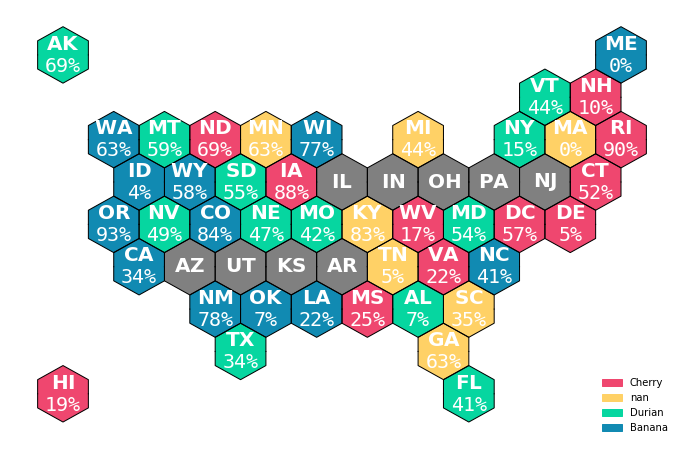

In [6]:
category_labels = {
    'Banana':'red',
    'Cherry': 'blue',
    'Apple': 'green',
    'Durian': 'purple'
}

shmapy.us_plot_hex(
    states[['state', 'category', 'values_label']], 
    size = 20, 
    chart_type='categorical', 
    line_color='black', 
    numeric_labels_custom='values_label',
    missing_kwargs={'missing_text_color':'white', 'missing_fill_color':'grey'},
    category_labels=['Banana','Cherry', 'Apple','Durian'],
    fill_color = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2'],
    figsize=(12, 8)
)

0.31029976002219173 HI


/Users/marshall.krassenstein/Desktop/shmapy/shmapy/input.py:56: UserWarning: 
        Expected input should only include 50 or 51 states. 
        Map will have missing hexagons
         
  warnings.warn(


AttributeError: module 'numpy' has no attribute 'isna'

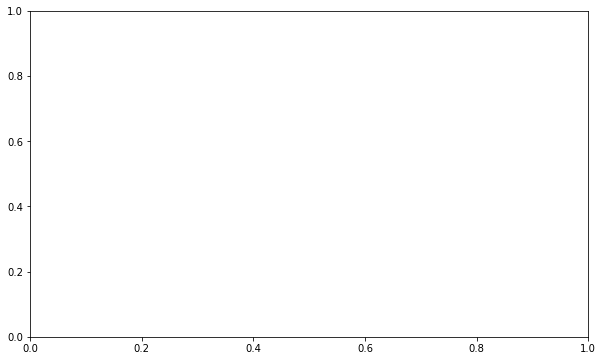

In [8]:
states = pd.DataFrame(pd.read_csv('../static/demo_input4.csv')['state'])
states['values'] = np.random.random(states.shape[0])

shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    missing_kwargs={'missing_text_color': 'pink', 'missing_fill_color':'blue'},
#     text_color='black',
    figsize=(10,6),
    size=12
)


In [12]:
type([np.nan])

list

In [ ]:
shmapy.hex_shmap.plot_hex()